# Data Analysis

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib as plt

In [2]:
%%time
df = pd.read_csv("./data/so_survey_results_public.csv")

CPU times: user 2.55 s, sys: 109 ms, total: 2.66 s
Wall time: 2.66 s


<string>:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.


## Printing unique values

_Aggregate_ columns contain semicolon-separated unique values

In [3]:
aggregate_columns = ['LanguageWorkedWith', 'LanguageDesireNextYear',
                   'DatabaseWorkedWith', 'DatabaseDesireNextYear',
                   'PlatformWorkedWith', 'PlatformDesireNextYear', 
                   'FrameworkWorkedWith', 'FrameworkDesireNextYear',
                    'IDE', 'VersionControl',
                   'CommunicationTools', 'AdBlockerReasons',
                   'Methodology', 'HackathonReasons']

def is_aggregate(column):
    return column in aggregate_columns

ignored_columns = ['Respondent', 'Country', 'DevType',
                   'Salary', 'ConvertedSalary', 'CurrencySymbol',
                   'EducationTypes', 'SelfTaughtTypes']

def is_ignored(column):
    return column in ignored_columns or column[-1].isdigit()

def print_column(column):
    print("\n[ {} ]".format(str(column)))
    values = df[column].unique().tolist()
    for value in values:
        print("\t{}".format(str(value)))
        
def print_aggregate_column(column):
    print("\n[ {} ]".format(str(column)))
    values = set()
    for row in df[column]:
        row_values = str(row).split(';')
        for value in row_values:
            values.add(value)
    for value in values:
        print("\t{}".format(str(value)))

In [4]:
%%time
for col in df:
    if is_aggregate(col):
        print_aggregate_column(col)
    elif not is_ignored(col):
        print_column(col)


[ Hobby ]
	Yes
	No

[ OpenSource ]
	No
	Yes

[ Student ]
	No
	Yes, part-time
	nan
	Yes, full-time

[ Employment ]
	Employed part-time
	Employed full-time
	Independent contractor, freelancer, or self-employed
	Not employed, and not looking for work
	Not employed, but looking for work
	nan
	Retired

[ FormalEducation ]
	Bachelor’s degree (BA, BS, B.Eng., etc.)
	Associate degree
	Some college/university study without earning a degree
	Master’s degree (MA, MS, M.Eng., MBA, etc.)
	Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)
	nan
	Primary/elementary school
	Professional degree (JD, MD, etc.)
	I never completed any formal education
	Other doctoral degree (Ph.D, Ed.D., etc.)

[ UndergradMajor ]
	Mathematics or statistics
	A natural science (ex. biology, chemistry, physics)
	Computer science, computer engineering, or software engineering
	Fine arts or performing arts (ex. graphic design, music, studio art)
	Information systems, information technology, or 

	Multiple times per day
	A few times per month or weekly
	nan
	A few times per week
	Daily or almost daily
	I have never visited Stack Overflow (before today)
	Less than once per month or monthly

[ StackOverflowHasAccount ]
	Yes
	nan
	I'm not sure / I can't remember
	No

[ StackOverflowParticipate ]
	I have never participated in Q&A on Stack Overflow
	A few times per month or weekly
	nan
	Less than once per month or monthly
	Daily or almost daily
	A few times per week
	Multiple times per day

[ StackOverflowJobs ]
	No, I knew that Stack Overflow had a jobs board but have never used or visited it
	Yes
	nan
	No, I didn't know that Stack Overflow had a jobs board

[ StackOverflowDevStory ]
	Yes
	No, I have one but it's out of date
	nan
	No, I know what it is but I don't have one
	No, and I don't know what that is

[ StackOverflowJobsRecommend ]
	nan
	7
	8
	10 (Very Likely)
	6
	5
	9
	1
	2
	0 (Not Likely)
	3
	4

[ StackOverflowConsiderMember ]
	Yes
	nan
	No
	I'm not sure

[ WakeTime ]
	Bet

## Simple bar charts

### Employment and Education

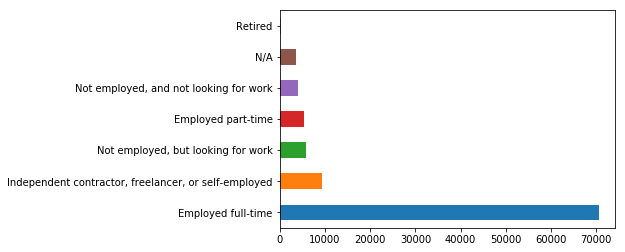

In [5]:
df['Employment'].fillna('N/A').value_counts().plot(kind='barh')

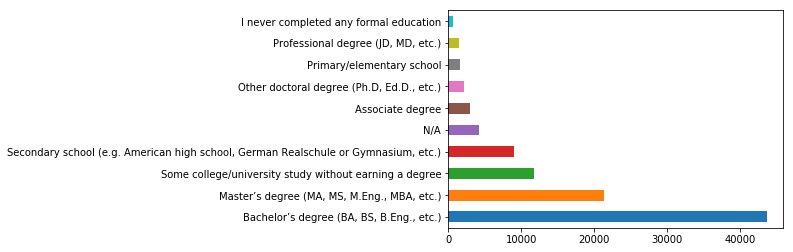

In [6]:
df['FormalEducation'].fillna('N/A').value_counts().plot(kind='barh')

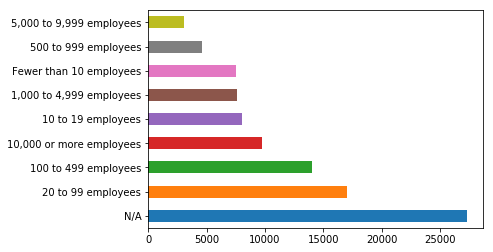

In [7]:
df['CompanySize'].fillna('N/A').value_counts().plot(kind='barh')

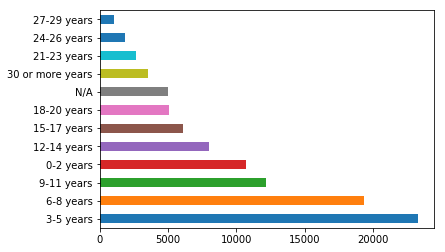

In [8]:
df['YearsCoding'].fillna('N/A').value_counts().plot(kind='barh')

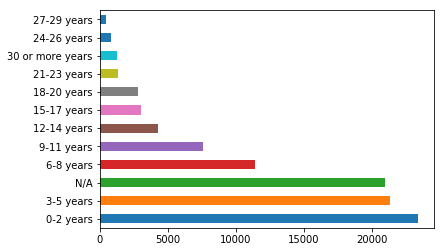

In [9]:
df['YearsCodingProf'].fillna('N/A').value_counts().plot(kind='barh')

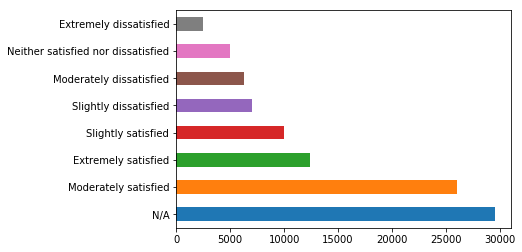

In [10]:
df['JobSatisfaction'].fillna('N/A').value_counts().plot(kind='barh')

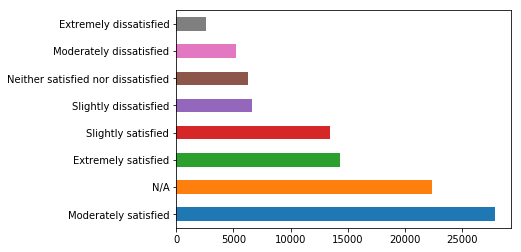

In [11]:
df['CareerSatisfaction'].fillna('N/A').value_counts().plot(kind='barh')

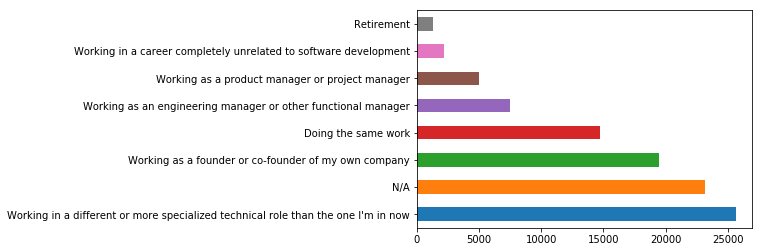

In [12]:
df['HopeFiveYears'].fillna('N/A').value_counts().plot(kind='barh')

### Views on AI

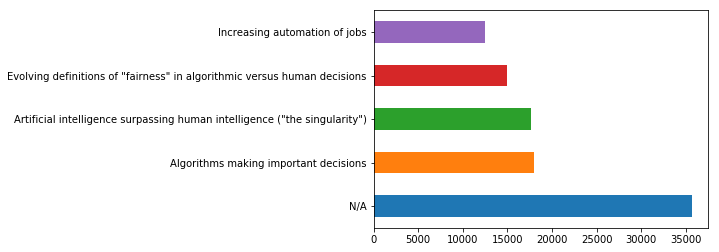

In [13]:
# What do you think is the most dangerous aspect of increasingly advanced AI technology?
df['AIDangerous'].fillna('N/A').value_counts().plot(kind='barh')

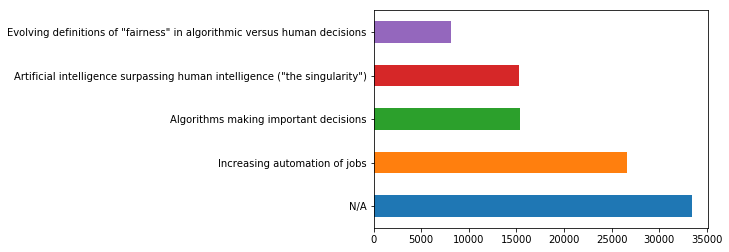

In [14]:
# What do you think is the most exciting aspect of increasingly advanced AI technology?
df['AIInteresting'].fillna('N/A').value_counts().plot(kind='barh')

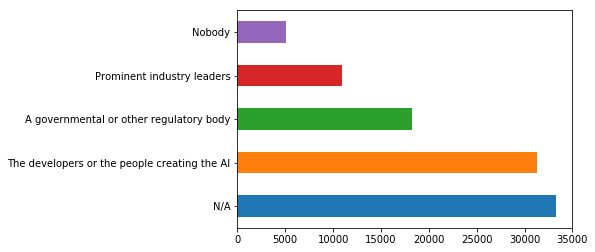

In [15]:
# Whose responsibility is it, *primarily*, to consider the ramifications of increasingly advanced AI technology?
df['AIResponsible'].fillna('N/A').value_counts().plot(kind='barh')

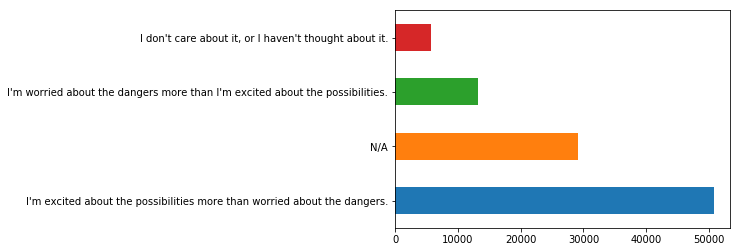

In [16]:
# Overall, what's your take on the future of artificial intelligence?
df['AIFuture'].fillna('N/A').value_counts().plot(kind='barh')

## Personal stuff

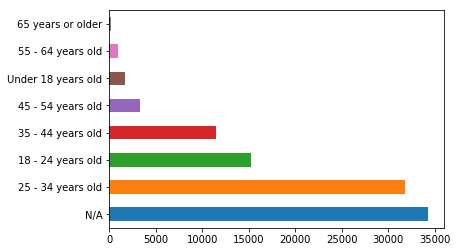

In [17]:
df['Age'].fillna('N/A').value_counts().plot(kind='barh')

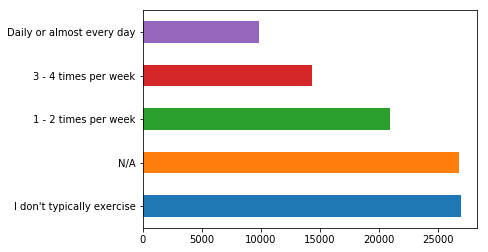

In [18]:
df['Exercise'].fillna('N/A').value_counts().plot(kind='barh')

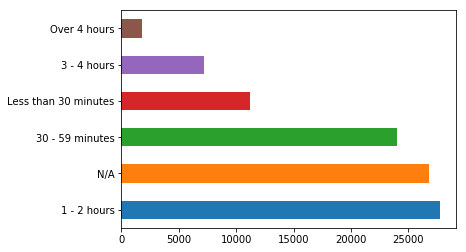

In [19]:
df['HoursOutside'].fillna('N/A').value_counts().plot(kind='barh')

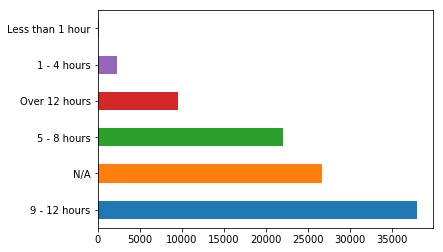

In [20]:
df['HoursComputer'].fillna('N/A').value_counts().plot(kind='barh')

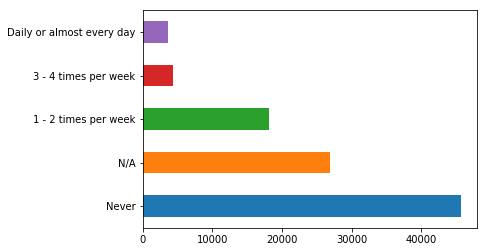

In [21]:
df['SkipMeals'].fillna('N/A').value_counts().plot(kind='barh')

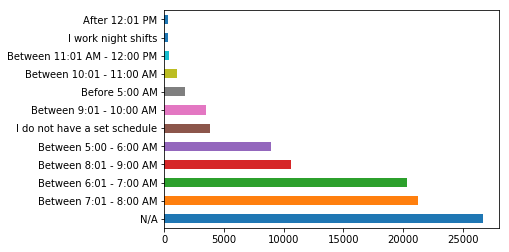

In [22]:
df['WakeTime'].fillna('N/A').value_counts().plot(kind='barh')